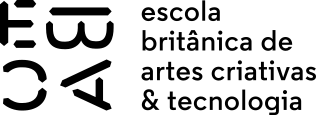





---


**Curso**: Ciência de dados;

**Módulo**: 11;

**Exercício**: 01;

**Futuro cientista de dados**: Lucas Cirilo dos Santos



---



# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib


from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import graphviz
import dtreeviz

# **Carregando Banco de dados**

In [4]:
df_database = pd.read_csv('https://raw.githubusercontent.com/dslucascirilo/EBAC/main/Data%20Science/M%C3%B3dulo%2011%20-%20A%CC%81rvores%20II%20(Parte%20I%20-%20a%CC%81rvore%20de%20regressa%CC%83o)/Database/housing.csv')
df = df_database

# Ensure the 'columns' list matches the actual columns in your DataFrame
columns = df.columns.tolist()  # Get the column names directly from the DataFrame

# No need to recreate the DataFrame, just use the existing one
# df = pd.DataFrame(data=df.values, columns=columns)

df.to_csv(path_or_buf='california_clean_data.csv', index=False)

#dropping missing and strings

df.dropna(inplace=True)
df = df.drop('ocean_proximity', axis=1)

#separating the x and y collumns to train and test the tree

X = df.drop(columns='median_house_value')
y = df['median_house_value']

# how much collumns and lines are in the dataframe

print('Quantidade de linhas e colunas de X:', X.shape)
print('Quantidade de linhas de y:', len(y))

df

Quantidade de linhas e colunas de X: (20433, 8)
Quantidade de linhas de y: 20433


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [5]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672


In [6]:
y.to_frame()

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [7]:
# Scikit-learn não aceita variáveis string nem missing.
# Verificação das variáveis.

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


In [8]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [9]:
df.corr().tail(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.0253,0.064894,0.688355,1.0


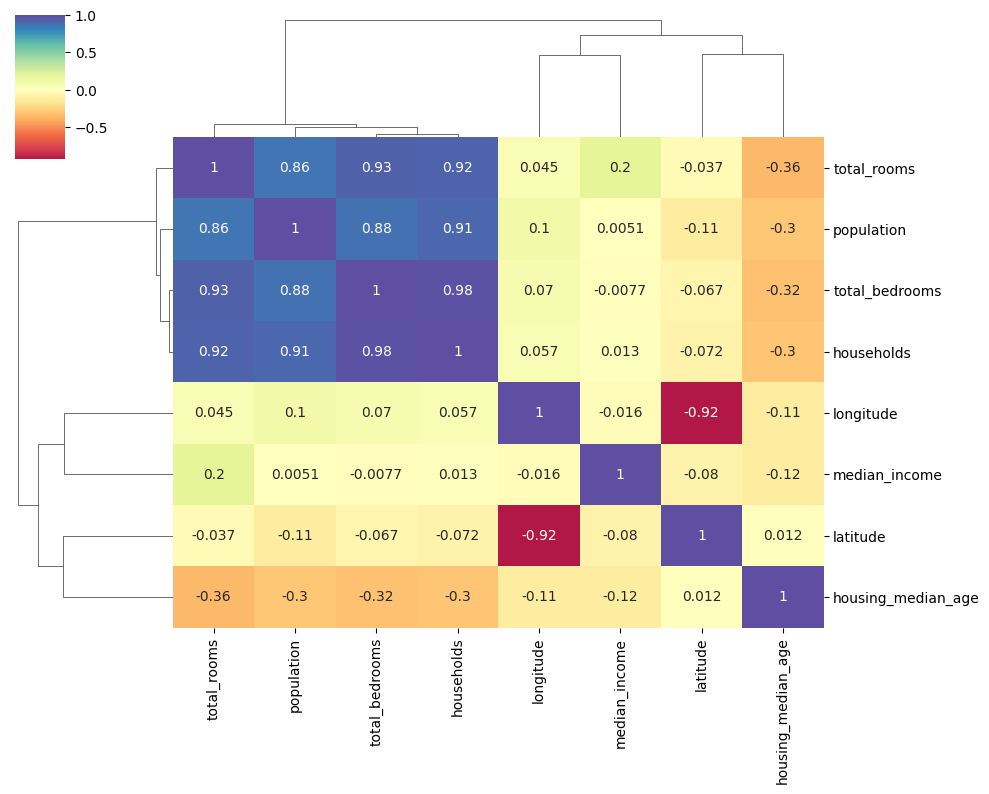

In [10]:
sns.clustermap(X.corr(),figsize = (10,8), center = 0, cmap = "Spectral", annot = True)

### 3. Separe os dados em validação e teste

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2507)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (15324, 8)
X_test: (5109, 8)
y_train: (15324,)
y_test: (5109,)


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [12]:
tree_1 = DecisionTreeRegressor(max_depth = 8, random_state = 2507)
tree_2 = DecisionTreeRegressor(max_depth = 2, random_state = 2507)

tree_1.fit(X_train, y_train)
tree_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=2507)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [13]:
# Calcula o MSE para as duas árvores
mse1_train = mean_squared_error(y_train, tree_1.predict(X_train))
mse1_test = mean_squared_error(y_test, tree_1.predict(X_test))
mse2_train = mean_squared_error(y_train, tree_2.predict(X_train))
mse2_test = mean_squared_error(y_test, tree_2.predict(X_test))

# Imprime os resultados de forma simplificada
print(f'Árvore 1 (profundidade {tree_1.get_depth()}) tem um erro quadrático médio de - Treino: {mse1_train:.2f}, Teste: {mse1_test:.2f}')
print(f'Árvore 2 (profundidade {tree_2.get_depth()}) tem um erro quadrático médio de - Treino: {mse2_train:.2f}, Teste: {mse2_test:.2f}')

Árvore 1 (profundidade 8) tem um erro quadrático médio de - Treino: 3284582344.90, Teste: 4127096433.51
Árvore 2 (profundidade 2) tem um erro quadrático médio de - Treino: 7415638786.29, Teste: 7275071562.62


In [14]:
#Another Option#

#mse1_train = mean_squared_error(y_true=y_train, y_pred=tree_1.predict(X_train))
#mse1_test = mean_squared_error(y_true=y_test, y_pred=tree_1.predict(X_test))

#mse2_train = mean_squared_error(y_true=y_train, y_pred=tree_2.predict(X_train))
#mse2_test = mean_squared_error(y_true=y_test, y_pred=tree_2.predict(X_test))

#template = 'O erro quadrático médio (MSE) da árvore com profunidade = {0} para a base de {1} é: {2:.2f}'

#print(template.format(tree_1.get_depth(), 'treino', mse1_train).replace('.', ','))
#print(template.format(tree_1.get_depth(), 'teste', mse1_test).replace('.', ','), '\n')

#print(template.format(tree_2.get_depth(), 'treino', mse2_train).replace('.', ','))
#print(template.format(tree_2.get_depth(), 'teste', mse2_test).replace('.', ','))

In [15]:
r2_1_train = tree_1.score(X=X_train, y=y_train)
r2_2_train = tree_2.score(X=X_train, y=y_train)

r2_1_test = tree_1.score(X=X_test, y=y_test)
r2_2_test = tree_2.score(X=X_test, y=y_test)

template = 'O coeficiente de determinação (R-quadrado) da árvore com profundidade = {0} para a base de {1} é: {2:.2f}'

print(template.format(tree_1.get_depth(), 'treino', r2_1_train).replace(".", ","))
print(template.format(tree_1.get_depth(), 'teste', r2_1_test).replace(".", ","), '\n')

print(template.format(tree_2.get_depth(), 'treino', r2_2_train).replace(".", ","))
print(template.format(tree_2.get_depth(), 'teste', r2_2_test).replace(".", ","))

O coeficiente de determinação (R-quadrado) da árvore com profundidade = 8 para a base de treino é: 0,75
O coeficiente de determinação (R-quadrado) da árvore com profundidade = 8 para a base de teste é: 0,69 

O coeficiente de determinação (R-quadrado) da árvore com profundidade = 2 para a base de treino é: 0,44
O coeficiente de determinação (R-quadrado) da árvore com profundidade = 2 para a base de teste é: 0,45


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

In [16]:
print(f'A árvore que parece mais adequada é `tree_1` com profundidade = {tree_1.get_depth()}')

tree_1

A árvore que parece mais adequada é `tree_1` com profundidade = 8


DecisionTreeRegressor(max_depth=8, random_state=2507)

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

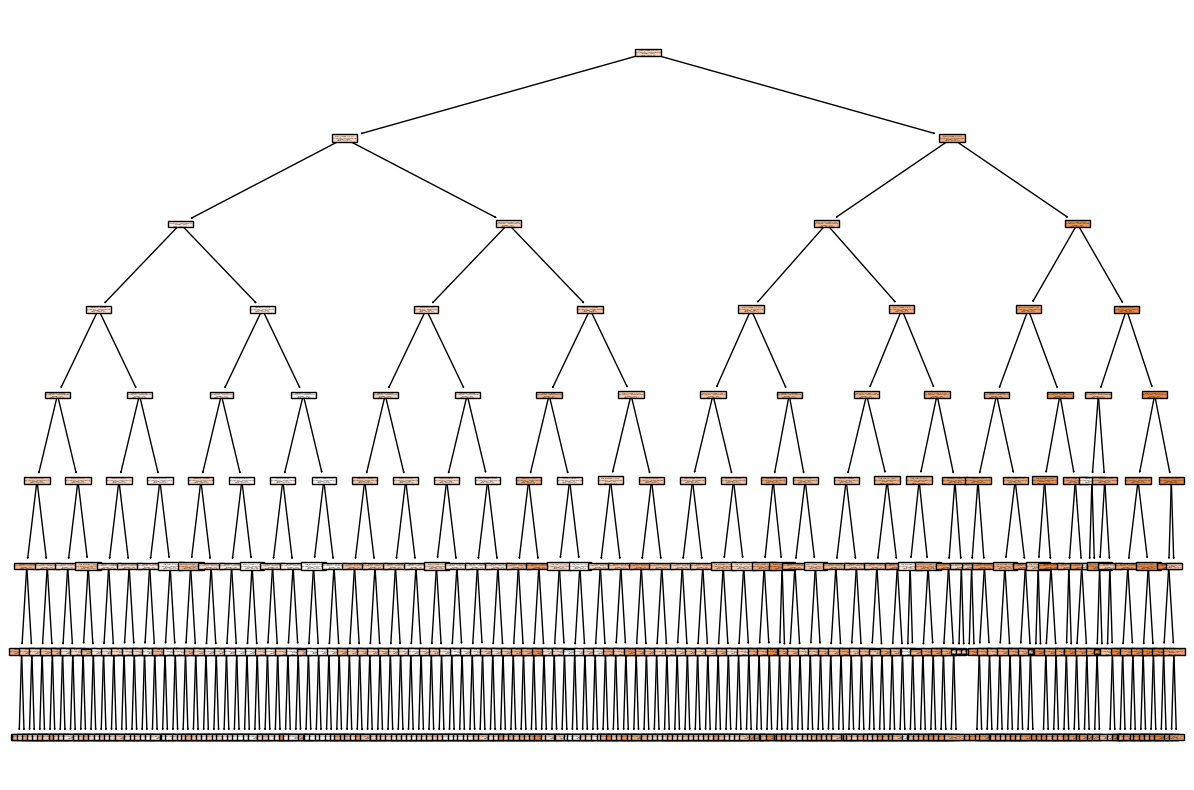

In [23]:
plt.rcParams['figure.figsize'] = [15, 10]


tp = tree.plot_tree(decision_tree=tree_1,
                    feature_names=X.columns,
                    filled=True)

Representação impressa da árvore

In [24]:
text_tree_print = tree.export_text(decision_tree=tree_1)

print(text_tree_print)

|--- feature_7 <= 5.14
|   |--- feature_7 <= 3.07
|   |   |--- feature_1 <= 34.45
|   |   |   |--- feature_0 <= -118.31
|   |   |   |   |--- feature_0 <= -118.35
|   |   |   |   |   |--- feature_1 <= 34.16
|   |   |   |   |   |   |--- feature_0 <= -118.42
|   |   |   |   |   |   |   |--- feature_0 <= -118.84
|   |   |   |   |   |   |   |   |--- value: [146100.00]
|   |   |   |   |   |   |   |--- feature_0 >  -118.84
|   |   |   |   |   |   |   |   |--- value: [364073.70]
|   |   |   |   |   |   |--- feature_0 >  -118.42
|   |   |   |   |   |   |   |--- feature_1 <= 34.05
|   |   |   |   |   |   |   |   |--- value: [206602.56]
|   |   |   |   |   |   |   |--- feature_1 >  34.05
|   |   |   |   |   |   |   |   |--- value: [363878.48]
|   |   |   |   |   |--- feature_1 >  34.16
|   |   |   |   |   |   |--- feature_1 <= 34.37
|   |   |   |   |   |   |   |--- feature_1 <= 34.25
|   |   |   |   |   |   |   |   |--- value: [202675.00]
|   |   |   |   |   |   |   |--- feature_1 >  34.25
|   | 

Visualização da árvore com graphviz & dtreeviz

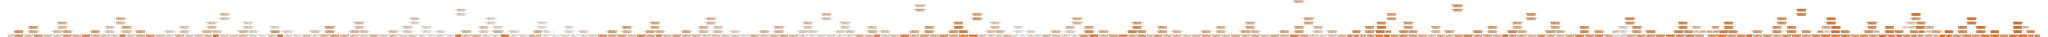

In [25]:
data = tree.export_graphviz(decision_tree=tree_1,
                            out_file=None,
                            feature_names=X.columns,
                            class_names=['0', '1'],
                            filled=True)

graphviz.Source(data, format='png')

In [26]:
viz_model = dtreeviz.model(
    model=tree_1,
    X_train=X,
    y_train=y,
    target_name='target',
    feature_names=X.columns,
    class_names=['0', '1']
)

viz_model.view(fontname="monospace")
viz_model


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


*A variável que me parece mais importante, é a de rendas denominada income, Visto que é a que traz um peso maior dentre as outras.*